# 원리

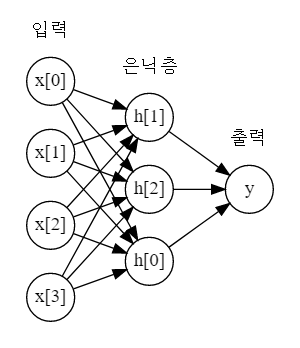

* 선형모델을 일반화 시킨것
    ```
    [x[0],x[1],x[2],x[3]] -> 활성화함수 -> [h[0],h[1],h[0]] -> y
    ```
* 선형모델을 비선형으로 만들기 위해 활성화 함수를 씀
    * Relu 함수
    * 하이퍼볼릭 탄젠트 함수
    * 시그모이드 함수

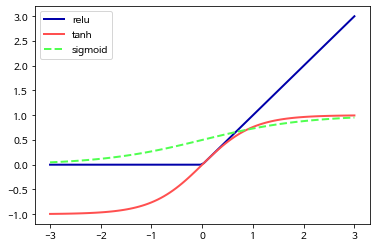

In [1]:
from ml1.preamble import*

line = np.linspace(-3,3,100)
plt.plot(line, np.maximum(0, line), label='relu')
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, 1/(1 + np.exp(-line)), label='sigmoid')
plt.legend()
plt.show()

# 매개변수

* hidden_layer_size : \[은닉 유닛의 수\]

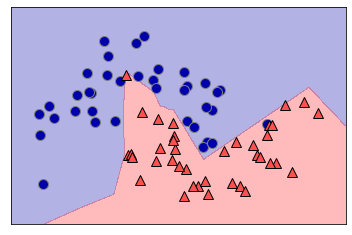

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 10개의 유닛으로 된 두개의 은닉충
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10], max_iter=1000, random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

* alpha : 규제 매개변수 : 클수록 규제가 커짐

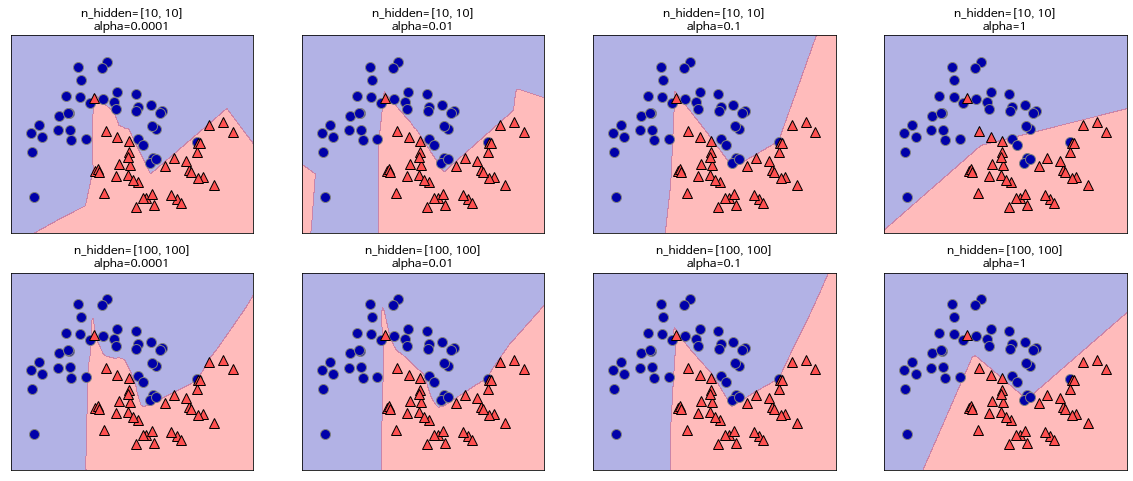

In [3]:
fig, axes = plt.subplots(2,4, figsize = (20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                          hidden_layer_sizes=[n_hidden_nodes]*2, alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train, ax=ax)
        ax.set_title(f'n_hidden={[n_hidden_nodes]*2}\nalpha={alpha}')

* random_state는 가중치의 초기값을 무작위로 설정하고 이는 다른 모델로 이어질 수 있음

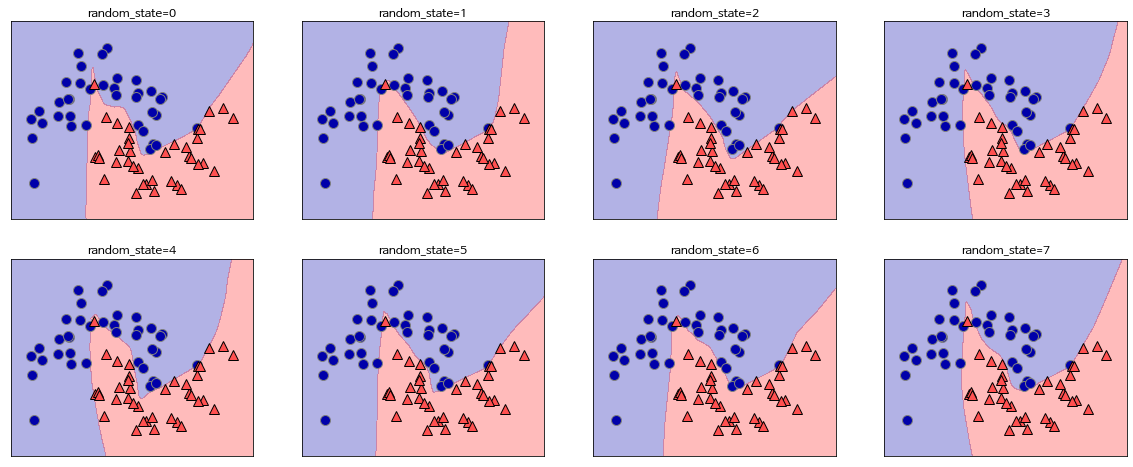

In [4]:
fig, axes=plt.subplots(2,4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs', random_state=i, max_iter=1000, hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train, ax=ax)
    ax.set_title(f'random_state={i}')

* solver : 모델 학습시키는 알고리즘
    * adam(default) :  스케일에 민감하므로 StandardScale등으로 전처리 중요
    * lgfgs : 안정적이지만 규모가 크면 시간이 오래 걸림
    * sgd : 고급옵션이여서 다른 매개변수도 설정해야되지만 성능 좋음

# 코드

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print(f'훈련 세트 정확도 : {mlp.score(X_train, y_train):.3f}')
print(f'테스트 세트 정확도 : {mlp.score(X_test, y_test):.3f}')

훈련 세트 정확도 : 0.939
테스트 세트 정확도 : 0.916


* StandarScaler로 스케일링 후

In [6]:
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_scaled = (X_train-mean)/std
X_test_scaled = (X_test-mean)/std
mlp = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_scaled, y_train)
print(f'훈련 세트 정확도 : {mlp.score(X_train_scaled, y_train):.3f}')
print(f'테스트 세트 정확도 : {mlp.score(X_test_scaled, y_test):.3f}')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


* 과대적합이므로 alpha를 증가시킨 후

In [7]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1).fit(X_train_scaled, y_train)
print(f'훈련 세트 정확도 : {mlp.score(X_train_scaled, y_train):.3f}')
print(f'테스트 세트 정확도 : {mlp.score(X_test_scaled, y_test):.3f}')

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.972


# 분석

* 가중치 시각화

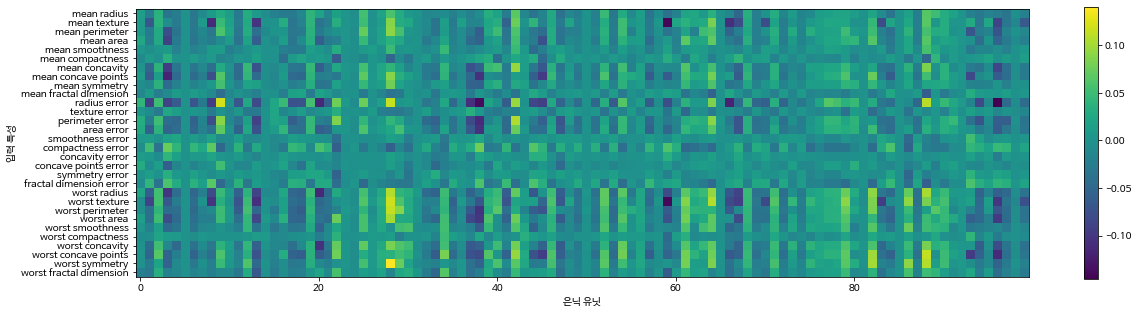

In [8]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

# 장단점

## 장점

* 복잡한 모델을 만들 수 있음
* 매우 뛰어난 성능

## 단점

* 전처리가 필요
* 학습이 오래 걸림
* 튜닝이 어려움